In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from colorama import Fore, Back, Style

In [2]:
DATA_DIR = "../input/emotionclss/"
train = {"input": [], "labels": []}
dev = {"input": [], "labels": []}
test = {"input": [], "labels": []}

with open(DATA_DIR + "train.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t") 
    for line in tsv_file:
        train["input"].append(line[0])
        labels = line[1].split(",")
        one_hot = [0 for i in range(28)]
        for label in labels:
            one_hot[int(label)] = 1
        train["labels"].append(one_hot)

with open(DATA_DIR + "dev.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t") 
    for line in tsv_file:
        dev["input"].append(line[0])
        labels = line[1].split(",")
        one_hot = [0 for i in range(28)]
        for label in labels:
            one_hot[int(label)] = 1
        dev["labels"].append(one_hot)

with open(DATA_DIR + "test.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t") 
    for line in tsv_file:
        test["input"].append(line[0])
        labels = line[1].split(",")
        one_hot = [0 for i in range(28)]
        for label in labels:
            one_hot[int(label)] = 1
        test["labels"].append(one_hot)
        
print("Number of train examples are {}".format(len(train["input"])))
print("Number of dev examples are {}".format(len(dev["input"])))
print("Number of test examples are {}".format(len(test["input"])))

Number of train examples are 43410
Number of dev examples are 5426
Number of test examples are 5427


## Analysing Train data

In [3]:
index_label = {0:"admiration", 1:"amusement", 2:"anger", 3:"annoyance", 4:"approval", 5:"caring", 6:"confusion",
            7:"curiosity", 8:"desire", 9:"disappointment", 10:"disapproval", 11:"disgust", 12:"embarrassment",
            13:"excitement", 14:"fear", 15:"gratitude", 16:"grief", 17:"joy", 18:"love", 19:"nervousness",
            20:"optimism", 21:"pride", 22:"realization", 23:"relief", 24:"remorse", 25:"sadness",
            26:"surprise", 27:"neutral"}
label_list = list(index_label.values())
print("Emotions are {}".format(label_list))

Emotions are ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [4]:
## number of examples with more than 1 class
count = 0
for i, text in enumerate(train["input"]):
    cnt = sum(train["labels"][i])
    if cnt > 1: count += 1
print(count)
    

7102


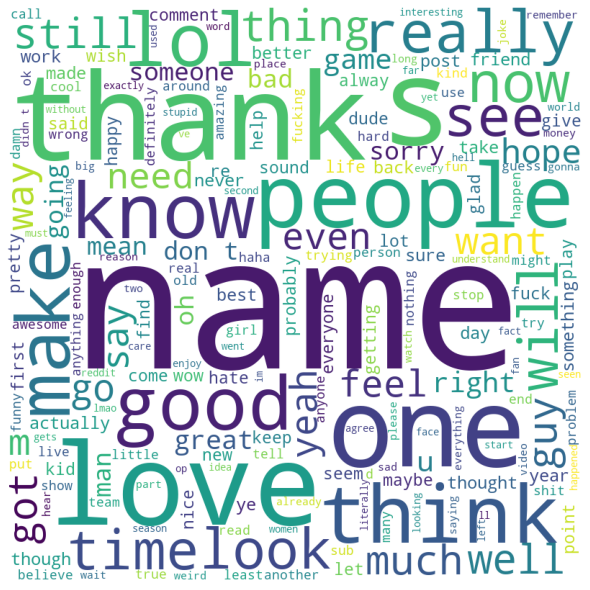

In [4]:
comment_words = ''
stopwords = set(STOPWORDS)

for text in train["input"]:
    tokens = text.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [6]:
# length of input sentences
length = 0
for text in train["input"]:
    length += len(text.split())
print("Average length of sentences is ", length/len(train["input"]))

Average length of sentences is  12.840175074867542


In [7]:
# Some emotion texts
emotion_texts = {}
for i in range(28):
    emotion_texts[i] = []

for i, input_ in enumerate(train["input"]):
    labels = train["labels"][i]
    for index,label in enumerate(labels):
        if label == 1:
            emotion_texts[index].append(input_)

In [8]:
for i in range(28):
    print(Fore.BLACK + label_list[i])
    print(Fore.RED + emotion_texts[i][0])
    print(Fore.RED + emotion_texts[i][1])

admiration
Damn youtube and outrage drama is super lucrative for reddit
Famous for his 3-4 Defense
amusement
Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
LOL. Super cute!
anger
WHY THE FUCK IS BAYLESS ISOING
Fucking coward.
annoyance
Dirty Southern Wankers
[NAME] - same fucking problem, slightly better command of the English language.
approval
Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
You can always kneel.
caring
R/sleeptrain Might be time for some sleep training. Take a look and try to feel out what's right for your family.
Good for #70 to console the poor guy
confusion
Demographics? I don’t know anybody under 35 who has cable tv.
Maybe that’s what happened to the great white at Houston zoo
curiosity
Ok, then what the actual fuck is your plan?
It's crazy how far Photoshop has come. Underwater bridges?!! NEVER!!!
desire
W

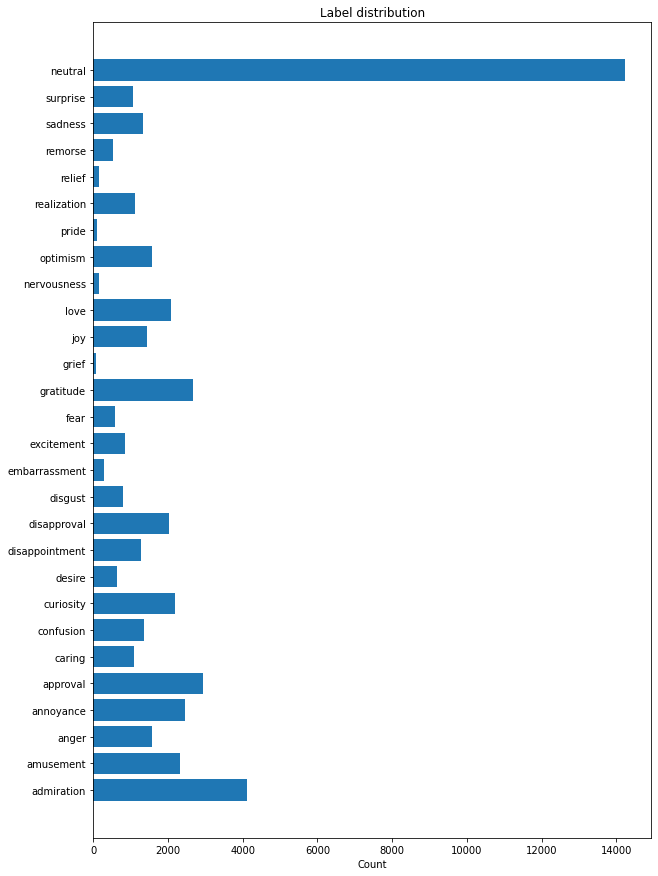

In [9]:
emotion_cnt = list(np.zeros(28))

train_inputs = train["input"]
train_labels = train["labels"]
for label in train_labels:
    for index in range(28):
        if label[index] == 1: emotion_cnt[index] += 1

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(10)
y = np.arange(len(emotion_cnt))
ax.barh(y, emotion_cnt, align='center')
ax.set_yticks(y, labels=label_list)
ax.set_xlabel('Count')
ax.set_title('Label distribution')

plt.show()

In [12]:
# Most frequent unigrams
unigrams = {}
#stop_words = set(stopwords.words('english'))
stop_words = set(stopwords)
for i in range(28):
    unigrams[i] = {}

punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~`’'''
remove = set(["'s", "n't", "'m", "...", "'re", "NAME"])
n = 1
for i, input_ in enumerate(train["input"]):
    tokens = list(word_tokenize(input_))
    tokens_filtered = [w for w in tokens if (w.lower() not in stop_words and w.lower() not in punc 
                                             and w.lower() not in remove)]
    grams = list(ngrams(tokens_filtered, n))
    
    labels = train["labels"][i]
    for index,label in enumerate(labels):
        if label == 1:
            for token in grams:
                if token[0] in unigrams[index]: unigrams[index][token[0]] += 1
                else: unigrams[index][token[0]] = 0

In [13]:
for i in range(28):
    print(Fore.BLACK + "Most common 5 unigrams for emotion '{}' are".format(index_label[i]))
    d = Counter(unigrams[i])
    for key, value in d.most_common(5):
        print(Fore.RED + "{}: {}".format(key, value))

Most common 5 unigrams for emotion 'admiration' are
NAME: 742
good: 464
great: 440
s: 250
amazing: 217
Most common 5 unigrams for emotion 'amusement' are
lol: 641
NAME: 354
Lol: 283
funny: 176
s: 154
Most common 5 unigrams for emotion 'anger' are
NAME: 280
hate: 152
fuck: 127
fucking: 122
people: 96
Most common 5 unigrams for emotion 'annoyance' are
NAME: 390
people: 170
s: 151
t: 146
one: 96
Most common 5 unigrams for emotion 'approval' are
NAME: 405
s: 185
right: 165
agree: 157
think: 136
Most common 5 unigrams for emotion 'caring' are
NAME: 120
will: 78
t: 67
better: 63
help: 63
Most common 5 unigrams for emotion 'confusion' are
NAME: 218
know: 143
sure: 125
t: 113
think: 77
Most common 5 unigrams for emotion 'curiosity' are
NAME: 354
know: 124
s: 113
curious: 111
t: 93
Most common 5 unigrams for emotion 'desire' are
wish: 201
NAME: 140
want: 104
need: 49
hope: 46
Most common 5 unigrams for emotion 'disappointment' are
NAME: 218
bad: 111
really: 79
s: 76
t: 70
Most common 5 unigrams

## Analyzing sentences with more than 1 classes

In [14]:
train.keys()

dict_keys(['input', 'labels'])

In [15]:
texts = []
text_labels = []
for i,text in enumerate(train["input"]):
    label = train["labels"][i]
    classes = [index_label[j] for j in range(28) if label[j] is 1]
    if len(classes) > 1:
        text_labels.append(classes)
        texts.append(text)

In [17]:
for i in range(10):
    print(text_labels[i])
    print(texts[i])

['desire', 'optimism']
We need more boards and to create a bit more space for [NAME]. Then we’ll be good.
['amusement', 'approval']
Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
['annoyance', 'embarrassment']
Shit, I guess I accidentally bought a Pay-Per-View boxing match
['confusion', 'realization']
Maybe that’s what happened to the great white at Houston zoo
['confusion', 'disappointment', 'neutral']
I never thought it was at the same moment, but sometimes after [NAME] sacrifice... sounds logical
['grief', 'sadness']
I miss them being alive
['anger', 'curiosity']
Ok, then what the actual fuck is your plan?
['admiration', 'gratitude']
aw, thanks! I appreciate that! 
['gratitude', 'love']
Thanks! I love watching him every week
['grief', 'neutral']
I read on a different post that he died shortly after of internal injuries.


## Checking if curiosity has more question marks

In [18]:
cur_texts = []
for i,text in enumerate(train["input"]):
    label = train["labels"][i]
    if label[7] == 1: cur_texts.append(text)

for i in range(15):
    print(cur_texts[i])

Ok, then what the actual fuck is your plan?
It's crazy how far Photoshop has come. Underwater bridges?!! NEVER!!!
I think the 90 day rule applies to increases over 5%?
So this means the people who have debt can see those that don’t. Am I sensing an easier target for muggings and such?
Who is this Wild team? Where have they been?
Wow, that landlady sure is a piece of shit. I'd be interested in knowing how many people she has discriminated against or harassed in the past.
Kinda. And thank you. I'm curious about those files and film and fotos you mentioned.
Is this a [NAME] reference. I feel like it is.
Hmmm, can I see that statistic claiming Rowan engineering is that high?
Who do you think can lead the Packers to where they need to be?
You live in Appalachia, don’t you?
Also curious. But as someone who lives in northern Ontario, this is pretty accurate
Like the handout this guy got to build the stadium?
I’m assuming you’re referring to the poor execution of the hanging? He only used half